# Health Insurance Cost Prediction

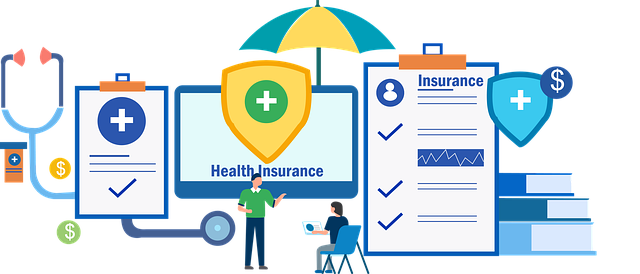

 **Importing the libraries and Creating a dataframe**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Insurance = pd.read_excel("Health_insurance_cost.xlsx")
Insurance

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


**Exploratory Data Analysis**

In [3]:
Insurance.shape

(1338, 7)

In [4]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
Insurance.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523


In [6]:
Insurance.describe(include = "all")

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [7]:
Insurance.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [8]:
Insurance.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
imputer = IterativeImputer()
Insurance["age"] = imputer.fit_transform(Insurance[["age"]])
Insurance["BMI"] = imputer.fit_transform(Insurance[["BMI"]])
Insurance["health_insurance_price"] = imputer.fit_transform(Insurance[["health_insurance_price"]])

In [11]:
Insurance.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [12]:
Insurance.duplicated().sum()

1

In [13]:
dup = Insurance[Insurance.duplicated().values]
dup

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [14]:
Insurance.drop([581],axis = 0,inplace = True)

In [15]:
Insurance.duplicated().sum()

0

In [16]:
Number_of_people_by_location = Insurance['location'].value_counts(dropna = False)
Number_of_people_by_location

southeast    364
southwest    325
northwest    324
northeast    324
Name: location, dtype: int64

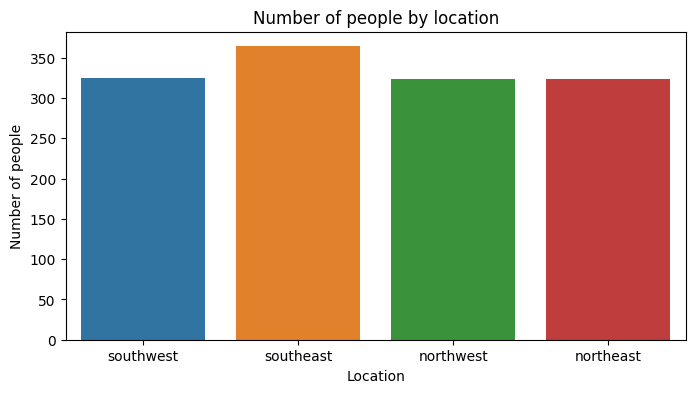

In [17]:
plt.figure(figsize = (8,4))
sns.countplot(x=Insurance['location'],data = Insurance)
plt.title("Number of people by location")
plt.xlabel("Location")
plt.ylabel("Number of people")
plt.show()

In [18]:
Number_of_people_by_gender= Insurance['gender'].value_counts(dropna = False)
Number_of_people_by_gender

male      675
female    662
Name: gender, dtype: int64

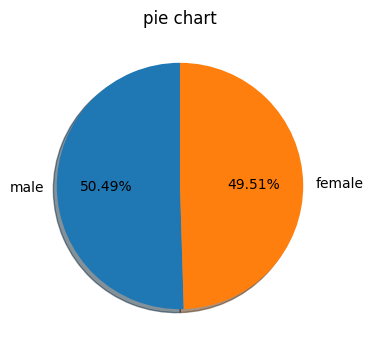

In [19]:
x = Number_of_people_by_gender
y = ["male","female"]

plt.figure(figsize = (8,4))
plt.pie(x,labels = y,autopct='%1.2f%%',shadow=True, startangle=90)
plt.title("pie chart")
plt.show()

In [20]:
mean_insurance_price_by_gender = Insurance[['gender', 'health_insurance_price']].groupby('gender', as_index = False).mean()
mean_insurance_price_by_gender

,gender,health_insurance_price
0,female,12552.558948
1,male,13987.935558


In [21]:
Number_of_people_by_smoking_status = Insurance['smoking_status'].value_counts(dropna = False)
Number_of_people_by_smoking_status

no     1063
yes     274
Name: smoking_status, dtype: int64

In [22]:
mean_insurance_price_by_smoking_status = Insurance[['smoking_status', 'health_insurance_price']].groupby('smoking_status', as_index = False).mean()
mean_insurance_price_by_smoking_status

,smoking_status,health_insurance_price
0,no,8448.875047
1,yes,32009.110770


In [23]:
mean_insurance_price_by_location = Insurance[['location', 'health_insurance_price']].groupby('location', as_index = False).mean()
mean_insurance_price_by_location

,location,health_insurance_price
0,northeast,13406.384516
1,northwest,12416.065625
2,southeast,14735.411438
3,southwest,12373.805896


<ipython-input-24-d383c504ccdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Insurance.corr()


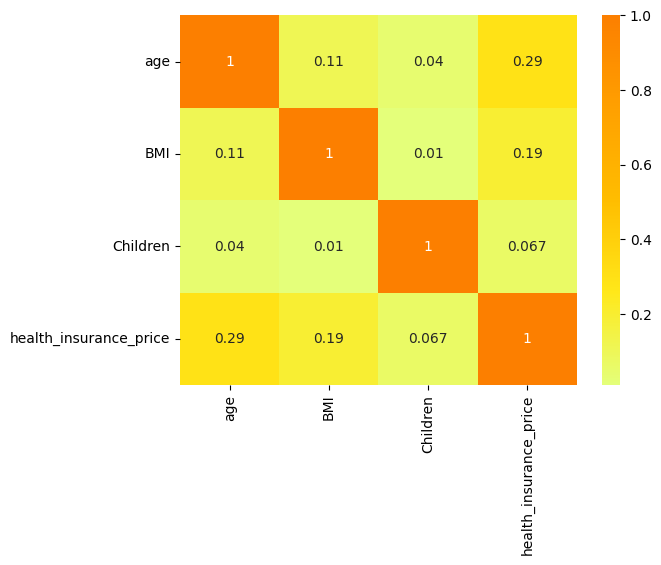

In [24]:
corr = Insurance.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

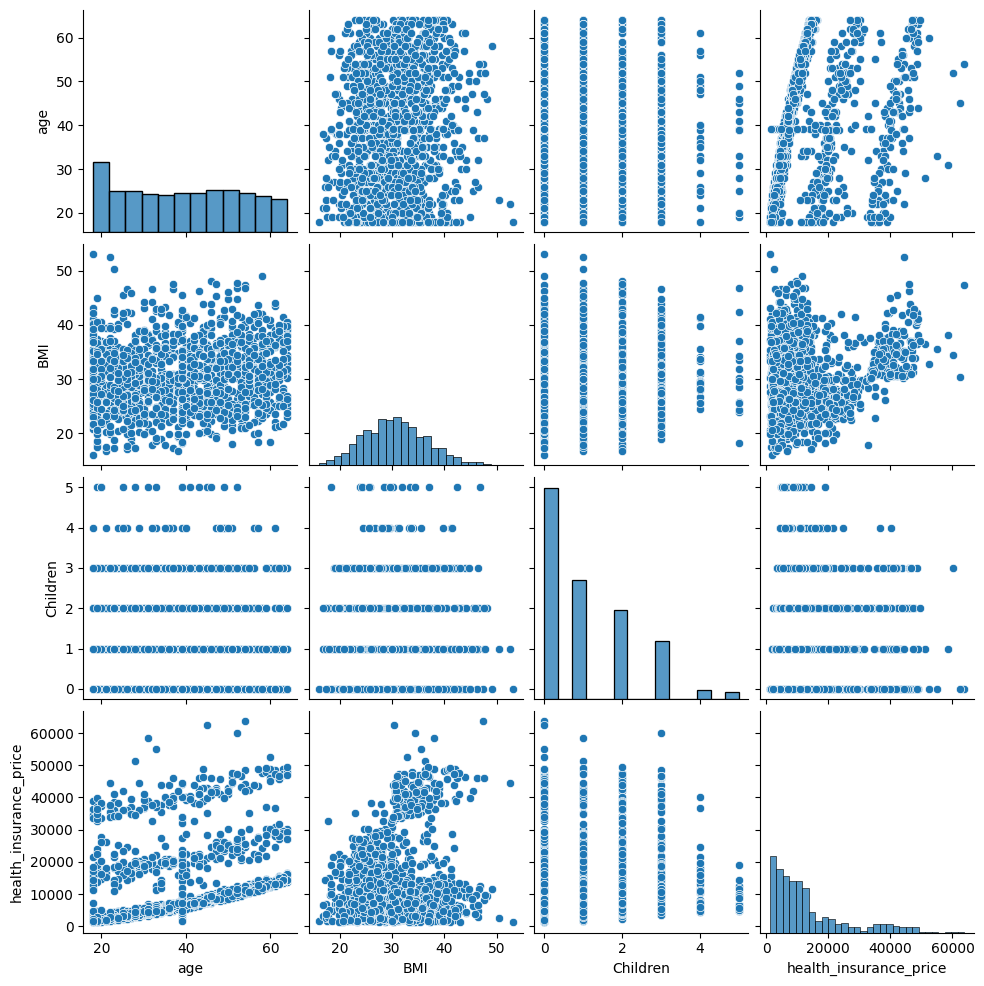

In [25]:
sns.pairplot(Insurance);

**Importing Machine Learning models**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
Insurance["gender"] = Insurance["gender"].map({"male": 1,"female": 0})
Insurance["smoking_status"] =Insurance["smoking_status"].map({"yes": 1,"no": 0})
Insurance["location"] =Insurance["location"].map({"southeast": 1,"northwest": 2,"northeast": 3,"southwest": 4})

In [28]:
X = Insurance.drop(["health_insurance_price"],axis = 1)
y = Insurance["health_insurance_price"]

**Training and Testing the model**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

In [32]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

Insurance = pd.DataFrame({"Actual":y_test,"Lr":y_pred1,"svm":y_pred2,"rf": y_pred3,"gr":y_pred4})

Insurance

,Actual,Lr,svm,rf,gr
1248,1633.96180,10539.939211,9461.261437,11511.823699,8227.696746
610,8547.69130,9852.916564,9509.271097,9901.297832,10562.503877
393,9290.13950,10689.559839,9523.036071,9233.971884,10958.811296
503,32548.34050,26339.065486,9358.683405,22734.074718,31806.801554
198,9644.25250,6988.874377,9526.565025,9359.077382,10683.844828
...,...,...,...,...,...
809,3309.79260,3276.734522,9377.283355,11628.824957,6058.240944
726,6664.68595,7898.003224,9468.566753,6765.142389,8021.377150
938,2304.00220,2193.162175,9356.325952,8599.803558,2493.798736
474,25382.29700,34742.029419,9549.628950,24516.584204,25274.998114


**Comparing the models**

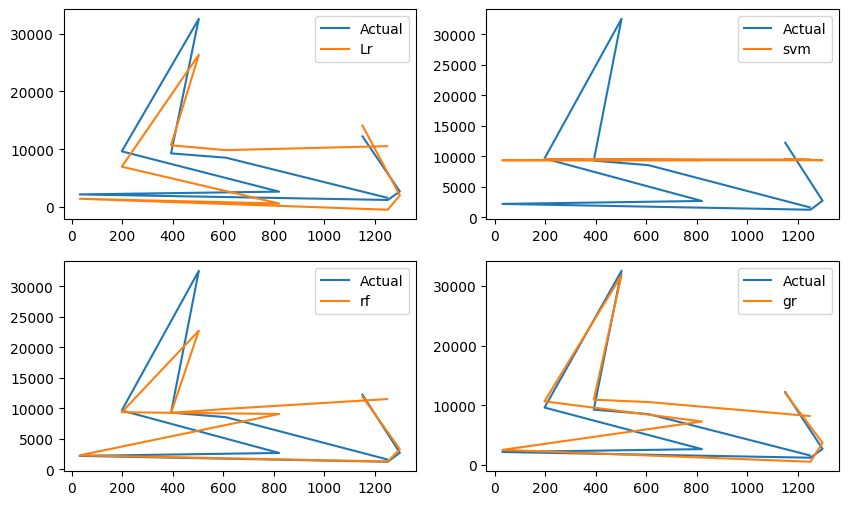

In [33]:
plt.figure(figsize = (10,6))

plt.subplot(221)
plt.plot(Insurance["Actual"].iloc[0:10],label = "Actual")
plt.plot(Insurance["Lr"].iloc[0:10],label = "Lr")
plt.legend()


plt.subplot(222)
plt.plot(Insurance["Actual"].iloc[0:10],label = "Actual")
plt.plot(Insurance["svm"].iloc[0:10],label = "svm")
plt.legend()


plt.subplot(223)
plt.plot(Insurance["Actual"].iloc[0:10],label = "Actual")
plt.plot(Insurance["rf"].iloc[0:10],label = "rf")
plt.legend()


plt.subplot(224)
plt.plot(Insurance["Actual"].iloc[0:10],label = "Actual")
plt.plot(Insurance["gr"].iloc[0:10],label = "gr")
plt.legend()

plt.show()

**Model Evaluation**

In [34]:
from sklearn import metrics

In [35]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [36]:
print(score1,score2,score3,score4)

0.7413111934749534 -0.11935538738196794 0.8218845242853049 0.8385377912550029


In [37]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [38]:
print(s1,s2,s3,s4)

4490.38204550591 9143.69647564713 3141.9089959988814 2904.8820105928035


In [39]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

**Saving the Model**

In [40]:
import joblib

In [41]:
joblib.dump(gr,"Health_price_Gr")

['Health_price_Gr']

In [42]:
model = joblib.load("Health_price_Gr")